<a href="https://colab.research.google.com/github/BureddySaiPoojitha/AIML_Module05_ALL_Labs_-/blob/main/MODULE5_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Training Program - AIM**L

# **MODULE 5: LAB 03**

# **CLUSTERING**

**K-Means**

K-Means algorithm is a centroid based clustering algorithm where the sum of distances of points from the centroid of each cluster is minimized. The final output is a set of K clusters .ie. the cluster assigned to each point and the K centroids of the clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

**Implementation of KMeans and testing on Synthetic Datasets**

In [2]:
k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato","yellowgreen","hotpink","gold"]
X,_=make_blobs(n_samples=800,n_features=3,centers=k,random_state=8)
print("Shape = "+str(X.shape))
print("Sample:")
print(X[:7])

Shape = (800, 3)
Sample:
[[ -0.9468406   -7.08044857 -10.49870245]
 [  6.9467032   10.13022389   7.82639526]
 [  5.12180499   9.47055906   7.33751064]
 [ -1.22967909  -3.1132812  -10.04557668]
 [  0.53253769  -5.95182102  -9.46020816]
 [  7.27055806   8.63310412   5.67309506]
 [ -0.50062027  -7.09573757  -9.08410157]]


In [6]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING

clusters={}
def initializeClusterCentroids():
  for i in range(k):
      center = np.random.randint(-6, 10, size= (X.shape[1],), )
      points = []

      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster

def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):
        distance_of_i = []
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center'])
            distance_of_i.append(d)
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix])

#UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']

        cluster_points = np.array(cluster_points)
        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0)
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = []

In [7]:
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)

        plot.scatter(cluster_center[0], cluster_center[1], s = 350, c = cluster_color, marker="o")

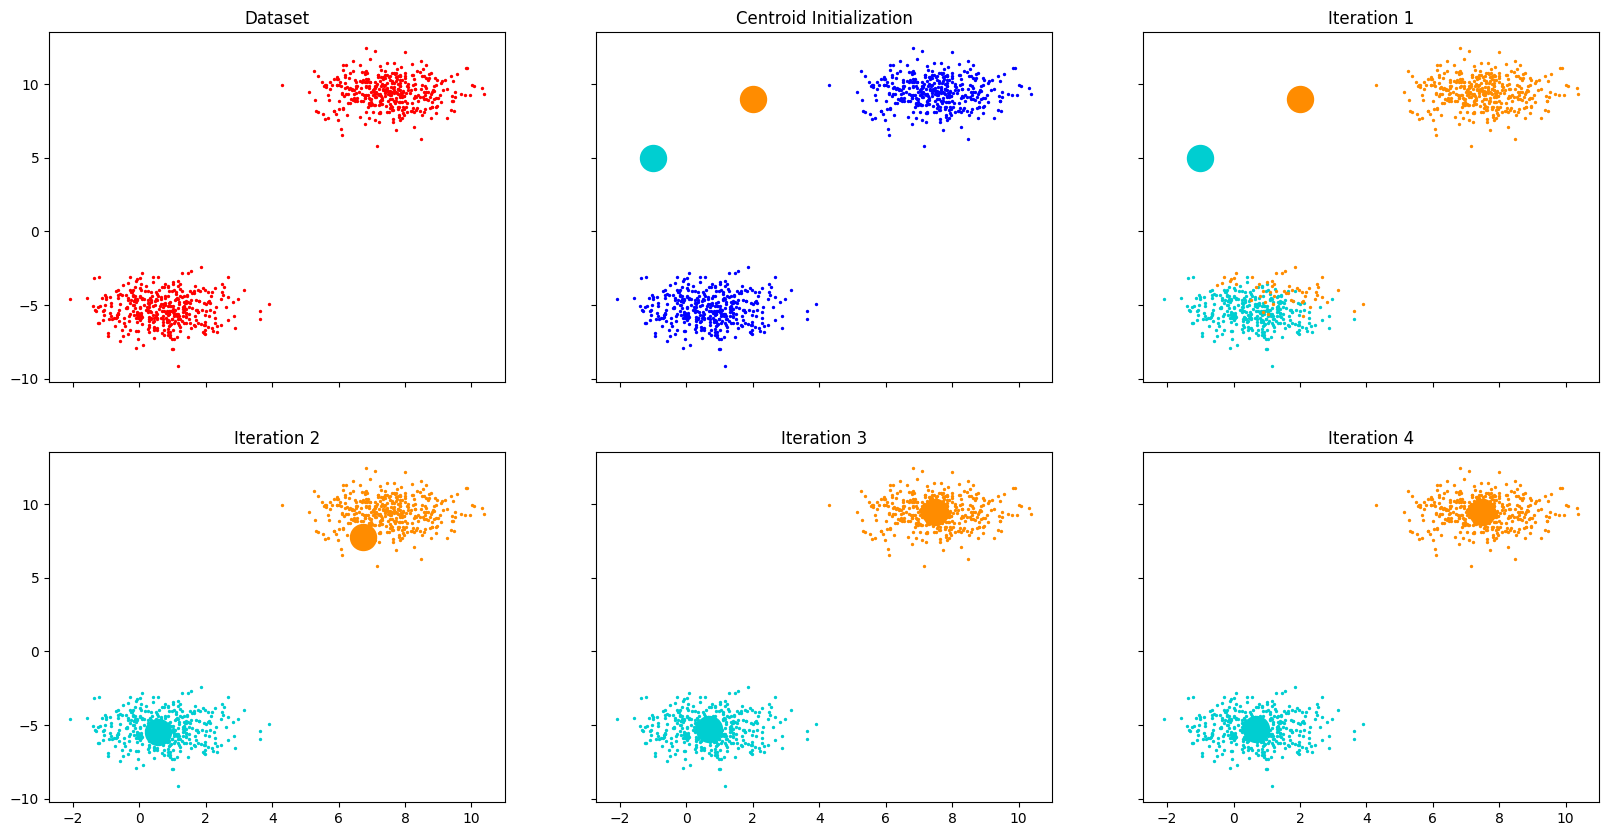

In [11]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'red')
axs[0, 0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'blue')
for i in range(k):
    center = clusters[i]['center']
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=350, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

for ax in axs.flat:
    ax.label_outer()

In [12]:
k=8
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=700, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (700, 2)
Sample:
[[ 2.26662407  9.1528498 ]
 [ 7.29239719  1.75988182]
 [-9.8341614  -1.53595156]
 [ 0.16271309 -5.0686167 ]
 [ 2.86590068  4.98010256]]


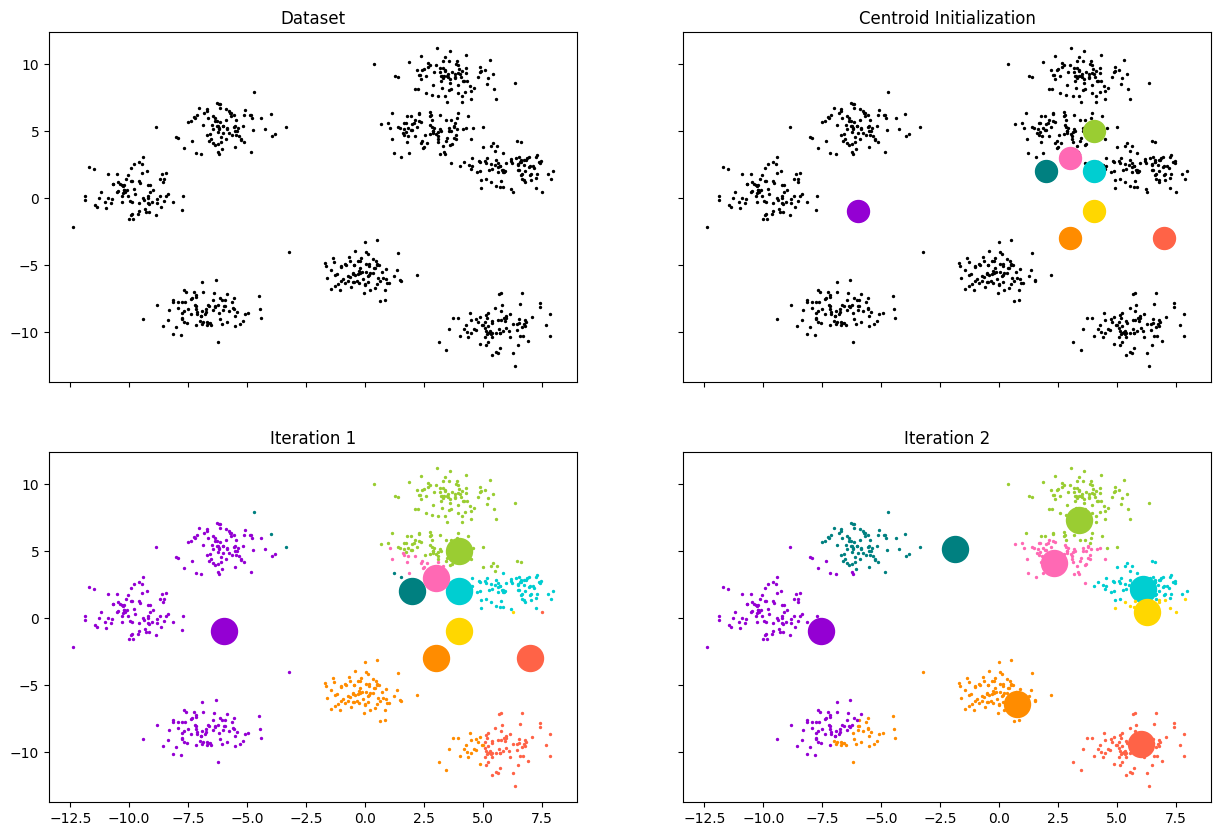

In [15]:
fig, axs = plt.subplots(2, 2) # Changed from (3, 2) to (2, 2)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')
np.random.seed(3)
initializeClusterCentroids()

axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):
    center = clusters[i]['center']
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[1, 0].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 1].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1,1])
updateCluster(clusters)

for ax in axs.flat:
    ax.label_outer()

In [17]:
from copy import deepcopy
def run_kmeans(k, X):
  initializeClusterCentroids()
  assignPointsToCluster(clusters, X)
  while (True):
    prev_clusters = deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
    if prev_clusters == clusters:
      break
  return clusters

# Kmeans in scikit-learn

In [18]:
from sklearn.cluster import KMeans

kmeans_demo = KMeans(n_clusters=5)
kmeans_demo.fit(X)

KMeans(n_clusters=5)

ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[-6.00001347  5.29221411]
 [ 2.76153269 -7.61577603]
 [ 4.16819415  5.42375921]
 [-9.82235889  0.40480405]
 [-6.72230371 -8.34818817]]



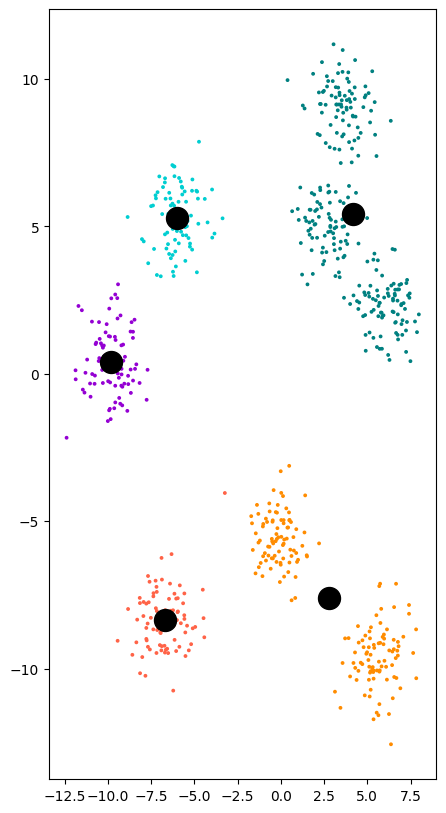

In [19]:
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=3)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "o")
plt.gcf().set_size_inches(5,10)
plt.show()

# KMeans on Digits Dataset(Kmeans for Labelling)

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(9, 64)

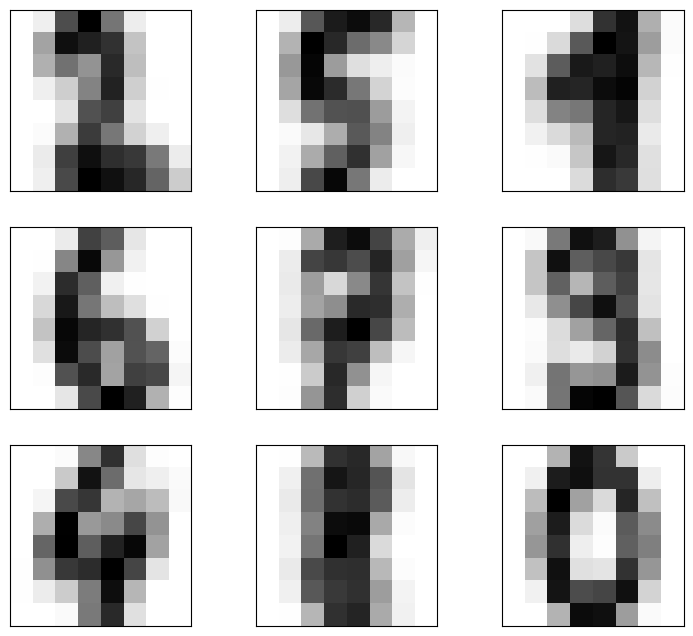

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(9, 8))
# Reshape to (9, 8, 8) since there are 9 clusters, each with an 8x8 representation
centers = kmeans.cluster_centers_.reshape(9, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [26]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

<ipython-input-26-56962d36160d>:5: RuntimeWarning: invalid value encountered in cast
  labels[mask] = mode(digits.target[mask])[0]


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7273233166388425

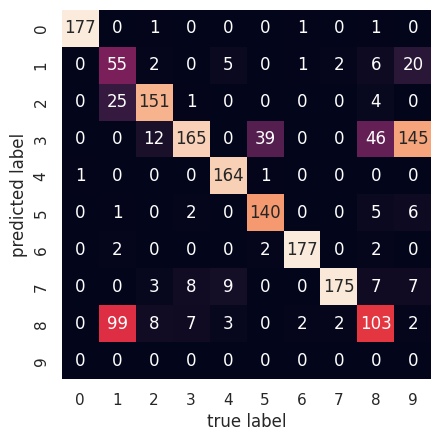

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# KMeans on Iris Dataset (Elbow Method)

In [29]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [30]:
iris = datasets.load_iris()
print(iris.data[:10])
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = df.iloc[:, [0,1,2,3]].values
df.head(5)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
kmeans5 = KMeans(n_clusters=7)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)
kmeans5.cluster_centers_

[6 1 1 1 6 5 1 6 1 1 6 6 1 1 5 5 5 6 5 6 6 6 1 6 6 1 6 6 6 1 1 6 5 5 1 1 6
 6 1 6 6 1 1 6 6 1 6 1 6 6 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [4.67894737, 3.08421053, 1.37894737, 0.2       ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.52857143, 4.04285714, 1.47142857, 0.28571429],
       [5.1125    , 3.52083333, 1.525     , 0.27083333]])

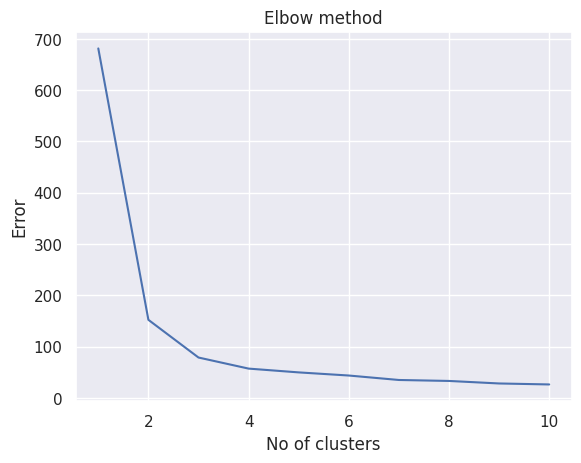

In [32]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [33]:
kmeans3 = KMeans(n_clusters=5)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)
kmeans3.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 4 1 1 4 2 4 1 4 1
 1 1 3 1 1 1 4 4 3 1 3 4 3 1 4 3 3 1 4 4 4 1 3 3 4 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.24722222, 2.84722222, 4.775     , 1.575     ],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

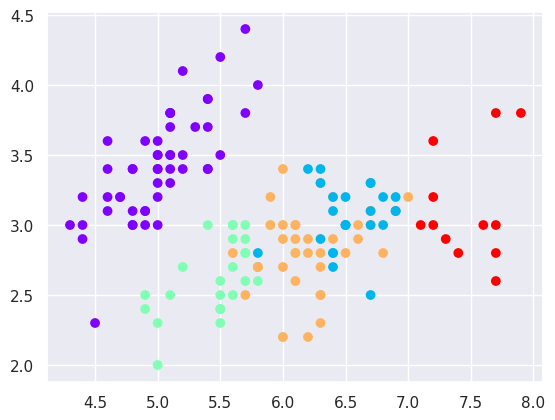

In [34]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')

# Points to think about

1.  Is feature scaling essential for KMeans as it is for most ML alogs ? Explain.

Yes, feature scaling is essential for KMeans because it relies on Euclidean distance, which is sensitive to differences in feature magnitude. Without scaling, features with larger ranges dominate clustering decisions. Standardization or normalization (scaling to [0,1]) helps balance feature influence.

2.  What are ways to prevent initialization variation in KMeans?

**KMeans++ Initialization** – Selects initial centroids more strategically to reduce random variance.
**Multiple Runs (n_init**)  – Runs KMeans multiple times with different initializations and selects the best.
**Mini-Batch KMeans** – Processes small data subsets iteratively, stabilizing convergence.

3.  What is the training and testing complexity of KMeans?

Training Complexity:
𝑂
(
𝑛
𝑘
𝑑
𝑖
)
O(nkdi) , where
n = samples,
k = clusters,
d = features,
i = iterations.

Testing Complexity:
𝑂
(
𝑛
𝑘
𝑑
)
O(nkd) (assigning new points to the nearest centroid)

# **Hierarchical Clustering**

# Dendograms

In [35]:
!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   1205      0  0:00:03  0:00:03 --:--:--  2246
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15021  100 15021    0     0   6013      0  0:00:02  0:00:02 --:--:-- 14740


# Agglomerative clustering on Mall Visitors Database

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [40]:
X = dataset.iloc[:, [3, 4]].values

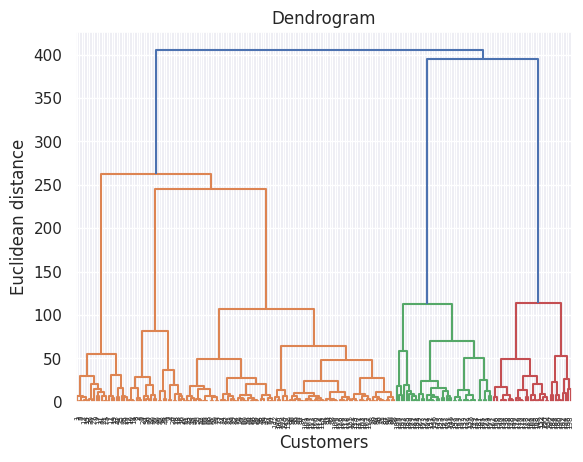

In [41]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

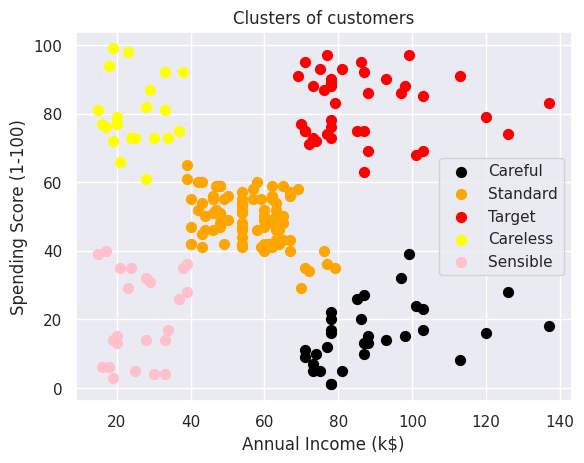

In [43]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'black', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'orange', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'red', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'yellow', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'pink', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Solving the Whole Customer Segmentation problem using Hierarchical Clustering

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [46]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


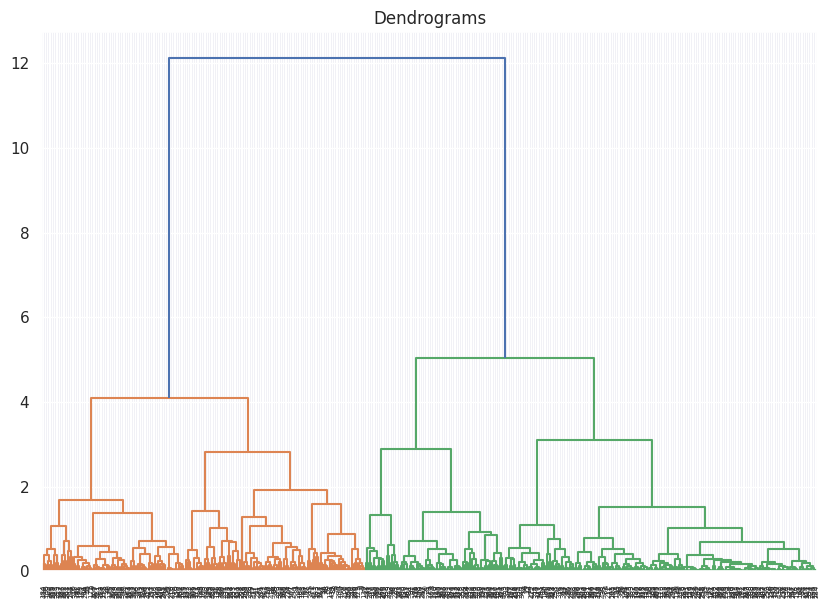

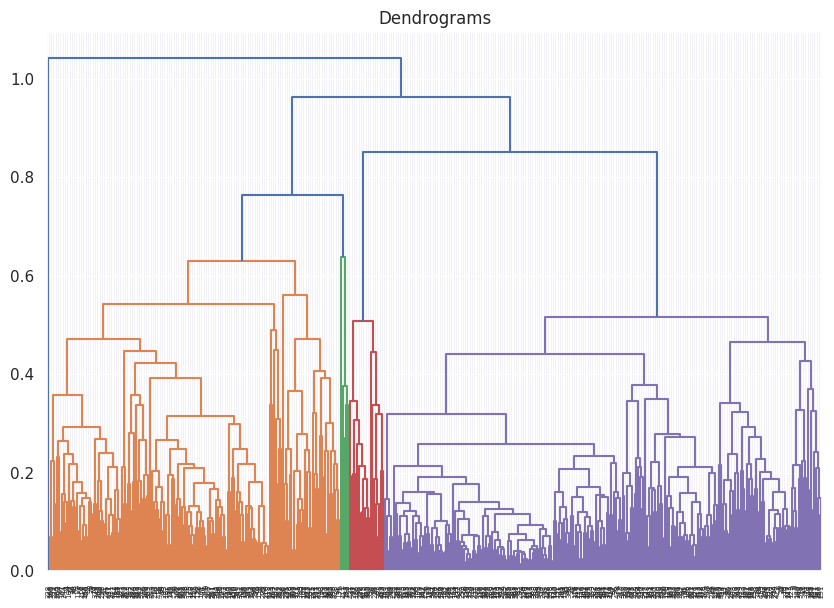

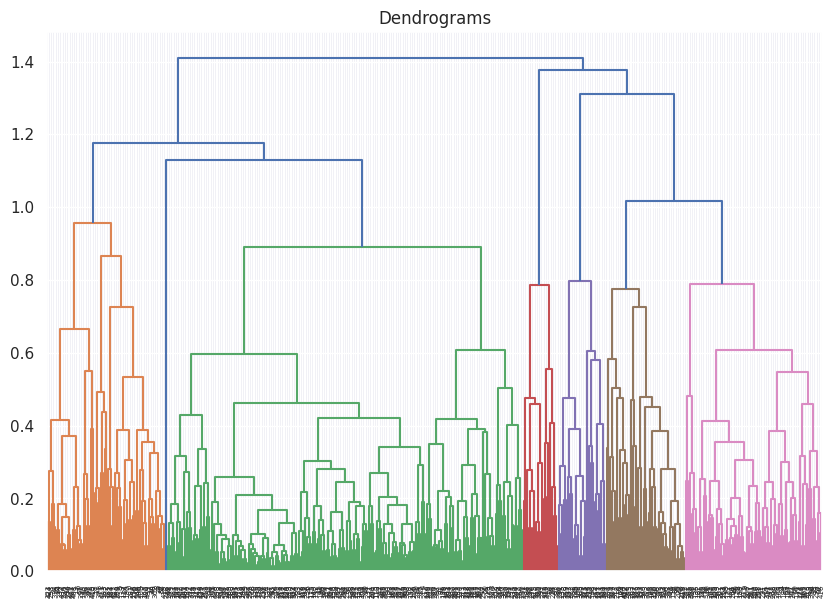

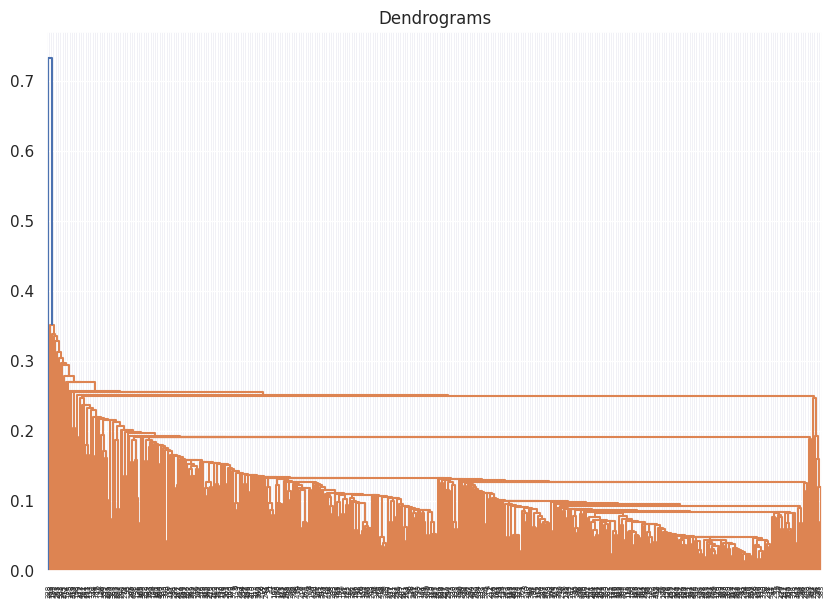

In [47]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))
  plt.title("Dendrograms")
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

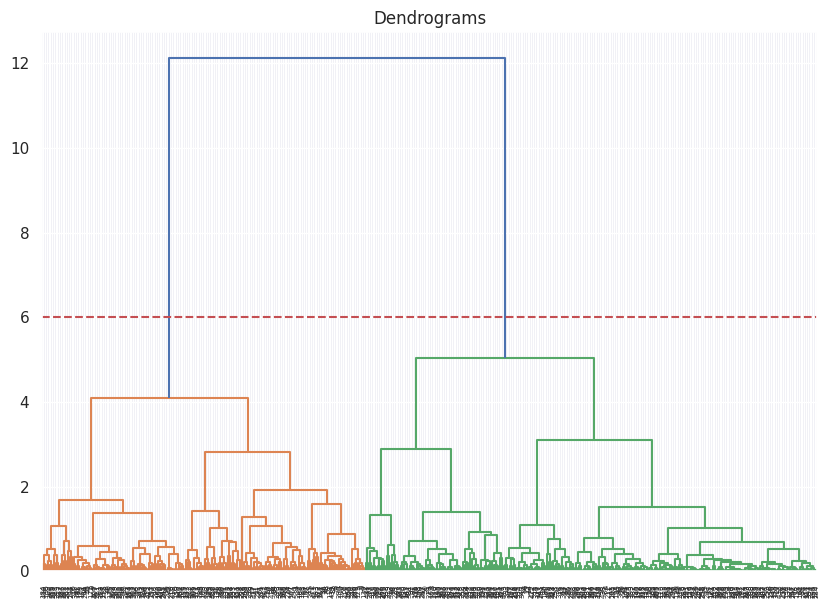

In [48]:
threshold = 6 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [49]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 2, 1, 4, 1, 1, 3, 3, 2, 4, 4, 4, 2, 3, 1, 4, 4, 2, 0,
       2, 1, 4, 4, 2, 2, 3, 2, 4, 1, 2, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 3,
       1, 1, 3, 1, 1, 3, 0, 1, 2, 3, 2, 1, 3, 1, 2, 1, 4, 1, 1, 1, 0, 3,
       3, 4, 1, 2, 0, 4, 0, 0, 1, 2, 0, 1, 2, 1, 2, 3, 1, 2, 4, 3, 1, 2,
       0, 2, 2, 0, 1, 0, 1, 3, 3, 0, 0, 0, 1, 3, 1, 2, 2, 2, 3, 1, 1, 3,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 4, 1, 2, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1,
       2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 1, 1, 1, 1, 2, 0, 3, 1, 3, 3, 3, 3,
       2, 4, 4, 1, 4, 2, 3, 1, 3, 0, 0, 3, 1, 1, 0, 2, 2, 3, 2, 0, 0, 3,
       0, 2, 3, 3, 4, 3, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 3, 3, 3, 2, 3, 0,
       2, 1, 0, 0, 2, 2, 4, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 4, 1, 3, 2, 2, 2, 0, 0, 3, 0, 4, 1, 2, 4, 0, 2, 2, 2, 0, 2, 3,
       3, 1, 3, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 4, 1, 4, 2, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 3, 1, 2, 4, 2, 4, 1, 3, 4,

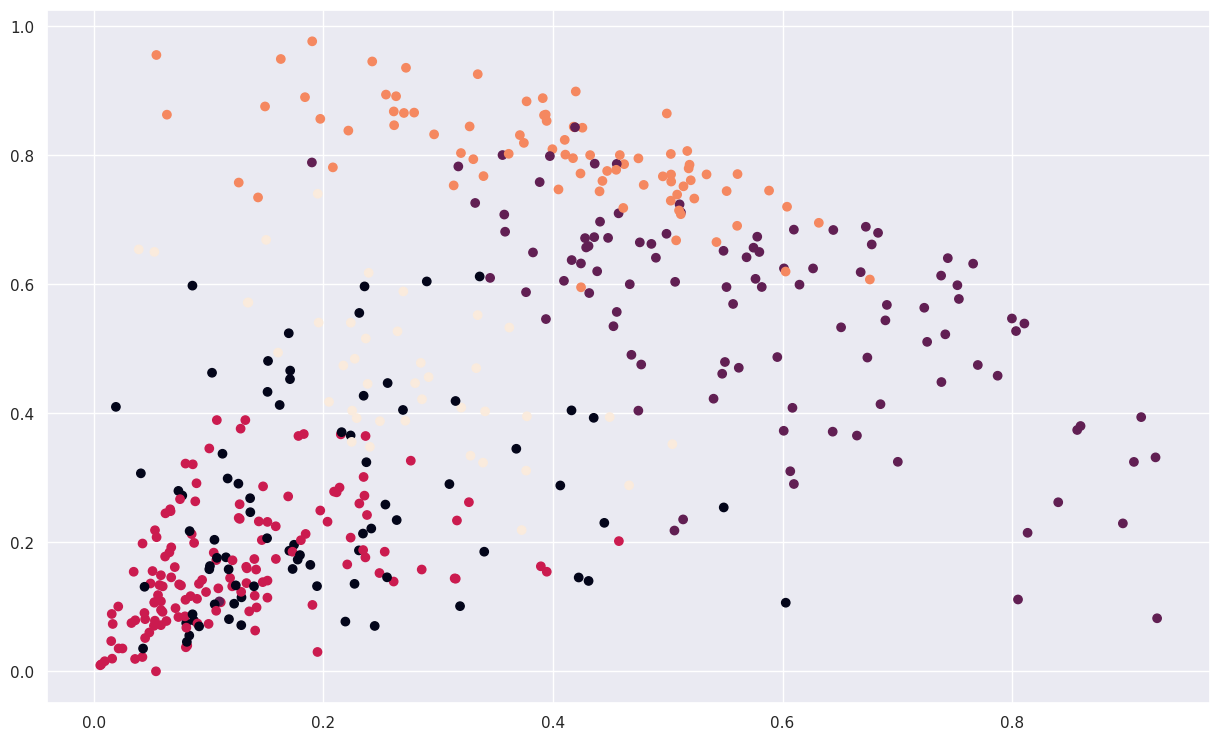

In [50]:
plt.figure(figsize=(15, 9))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

# **Exercises**

1.  What is the need for hierarchical clustering and its advantages over KMeans?

Hierarchical clustering provides a dendrogram for better interpretability and doesn’t require a predefined
k. It handles arbitrary-shaped clusters but is computationally expensive for large datasets.

2.   What is the advantages of Density Based Clustering over KMeans?

Density-based clustering (e.g., DBSCAN) detects arbitrarily shaped clusters and is robust to noise, unlike KMeans, which assumes spherical clusters and is sensitive to outliers. It also doesn’t require specifying
k in advance.

**Conclusion**

Hierarchical clustering is a very useful way of segmentation. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, it doesn't work well when we have huge amount of data.

